In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys

#for iterations and visualizations
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

#geo pandas
import geopandas as gpd
import json

#enviroment to plotly
import plotly.io as pio

In [53]:
# process for consulting in bigquery

sys.path.append('../query')
from extract_data_cloud import database

sys.path.append('../geo/json_states')
from malhas_br import select_uf

In [54]:
database.head()
# database.shape

,ano,sigla_uf,sigla_uf_nome,id_municipio,id_municipio_nome,tempo_medio_deslocamento,prop_deslocamento_acima_1_hora
0,2010,RO,Rondônia,1100205,Porto Velho,28,7.0
1,2010,AC,Acre,1200401,Rio Branco,26,5.0
2,2010,PA,Pará,1202400,None,21,3.0
3,2010,PA,Pará,1206500,None,25,7.0
4,2010,AM,Amazonas,1302603,Manaus,41,17.0


Median: 34.0, Mean: 35.54, Std: 11.08


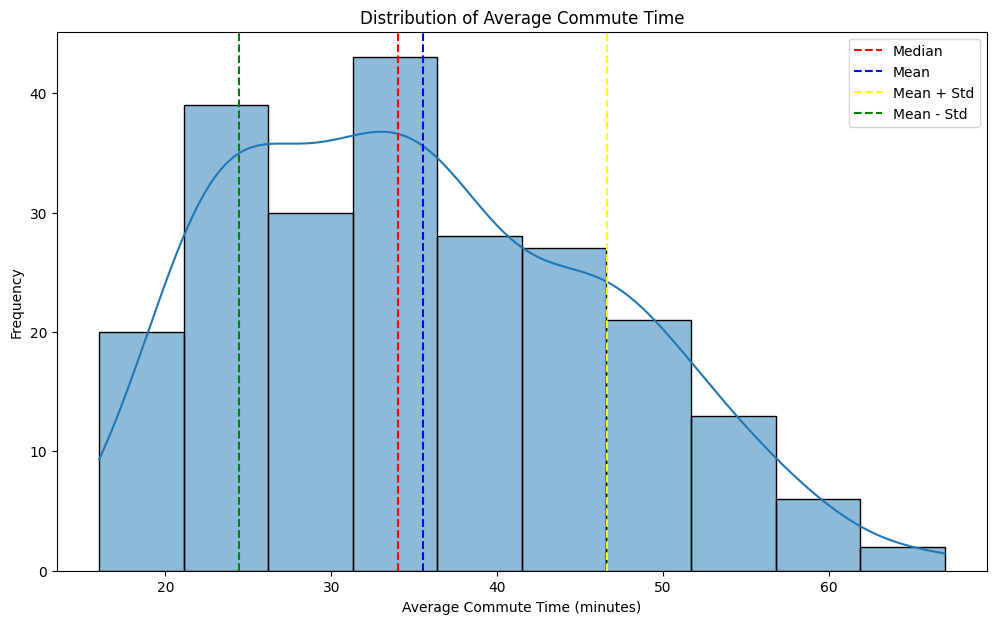

In [55]:
fig, ax = plt.subplots(figsize=(12, 7))

median = database['tempo_medio_deslocamento'].median()
mean = database['tempo_medio_deslocamento'].mean()
std = database['tempo_medio_deslocamento'].std()
print(f"Median: {median}, Mean: {mean.round(2)}, Std: {std.round(2)}")
sns.histplot(database['tempo_medio_deslocamento'], kde=True, bins=10)
plt.axvline(median, color='red', linestyle='--', label='Median')
plt.axvline(mean, color='blue', linestyle='--', label='Mean')
plt.axvline(mean + std, color='yellow', linestyle='--', label='Mean + Std')
plt.axvline(mean - std, color='green', linestyle='--', label='Mean - Std')
plt.title('Distribution of Average Commute Time')
plt.xlabel('Average Commute Time (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

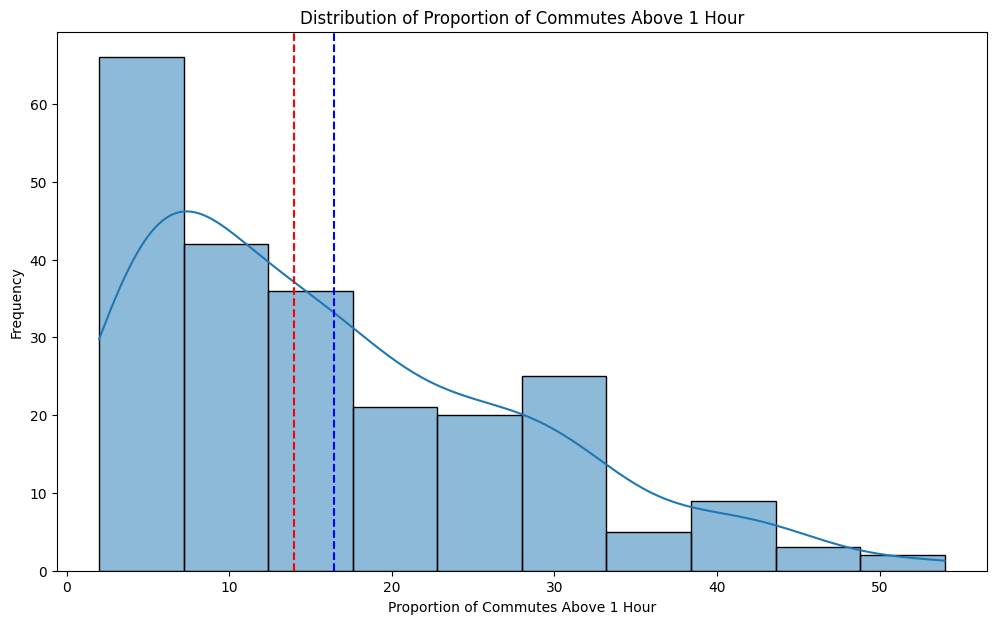

In [56]:
# for grouping less than 1 hour - percent for 1 hour or more

fig, ax = plt.subplots(figsize=(12, 7))
sns.histplot(database['prop_deslocamento_acima_1_hora'], kde=True)
plt.axvline(database['prop_deslocamento_acima_1_hora'].median(), color='red', linestyle='--', label='Median')
plt.axvline(database['prop_deslocamento_acima_1_hora'].mean(), color='blue', linestyle='--', label='Mean')
plt.title('Distribution of Proportion of Commutes Above 1 Hour')
plt.xlabel('Proportion of Commutes Above 1 Hour')
plt.ylabel('Frequency')
plt.show()

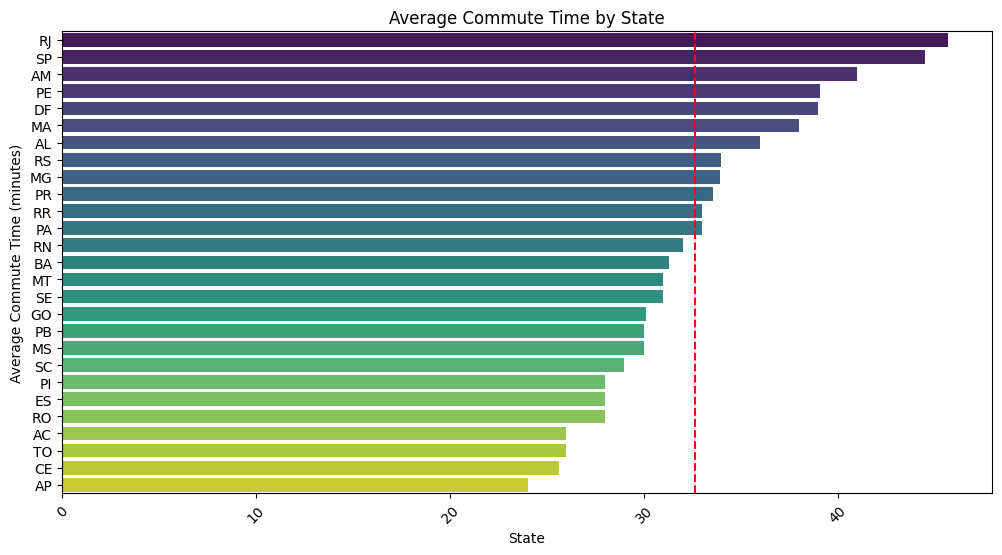

In [57]:
grouping_df = database.groupby('sigla_uf')['tempo_medio_deslocamento'].agg(['mean', 'median', 'std', 'count']).reset_index()

order = grouping_df.sort_values('mean', ascending=False)['sigla_uf']

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(y='sigla_uf', x='mean', data=grouping_df, palette='viridis', order=order)
plt.axvline(grouping_df['mean'].mean(), color='red', linestyle='--', label='Mean of Means')

plt.xticks(rotation=45)
plt.title('Average Commute Time by State')
plt.xlabel('State')
plt.ylabel('Average Commute Time (minutes)')
plt.show()

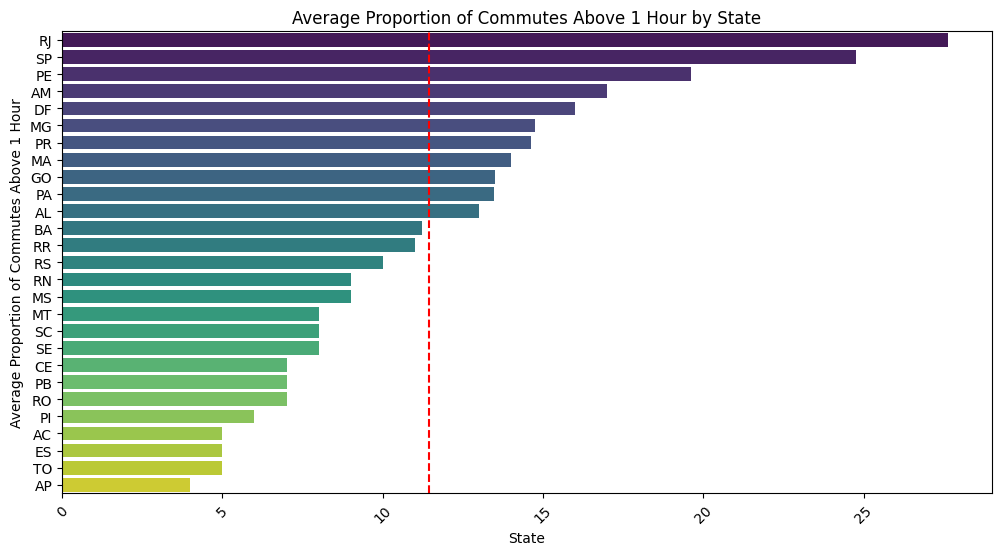

In [58]:
grouping_df_prop = database.groupby('sigla_uf')['prop_deslocamento_acima_1_hora'].agg(['mean', 'median', 'std', 'count']).reset_index()
order = grouping_df_prop.sort_values('mean', ascending=False)['sigla_uf']

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(y='sigla_uf', x='mean', data=grouping_df_prop, palette='viridis', order=order)
plt.axvline(grouping_df_prop['mean'].mean(), color='red', linestyle='--', label='Mean of Proportion of Commutes Above 1 Hour')

plt.xticks(rotation=45)
plt.title('Average Proportion of Commutes Above 1 Hour by State')
plt.xlabel('State')
plt.ylabel('Average Proportion of Commutes Above 1 Hour')
plt.show()

In [63]:
import sys
sys.path.append('../functions_insights')
from visualize_time_spent import plot_state

ModuleNotFoundError: No module named 'visualize_time_spent'